In [1]:
# generate music (JUNG_3_5_2021)
import numpy as np
import json

songname = './data/daechita'


# read cycle info from file
f = open(songname+'_cycleinfo_pitchinx.txt')
Lines = f.readlines()
c = []
for line in Lines:
    ci = json.loads(line)
    c.append(ci)

# overlap_matrix of 4 consecutive nodes    
nodelist = sorted(list(np.loadtxt(songname+'_nodelist.txt',delimiter=',')))
L = list(np.loadtxt(songname+'_allnode.txt',delimiter=','))
matrix = []; 
for ci in c:
    row = []
    for node in L:
        inx = nodelist.index(node)
        if inx in ci:
            row.append(1)
#            row.append(ci.index(inx)+1)
        else:
            row.append(0)
    matrix.append(row)
for q in [3]: # Consecutive sequence of at least 4 nodes
    mat = [];
    for j,row in enumerate(matrix):
        new = []; leng = 0
        # construct new row
        for i,node in enumerate(row):
            if node == 0:
                if leng == 0:
                    new.append(0)
                else:
                    if leng > q:
                        new += row[i-leng:i]+[0]
                    else:
                        new += [0]*leng+[0]
                    leng = 0
            else:
                leng += 1
        if leng != 0:
            if leng > q:
                new += row[len(row)-leng:]
            else:
                new += [0]*leng
        mat.append(new)

overlap_matrix = np.array(mat).transpose()

In [2]:
########################
# MAKE A NODE POOL & INTERSECTION 
########################

import random
from music21 import *


# pitches used in SYJ,SKY,TR
pitchlist = list(set(int(node) for node in nodelist))
# midilist = [int(round(69 + 12 * np.log2(f/440))) for f in pitchlist]
midilist = []
for i in range(len(pitchlist)):
    if pitchlist[i] == 0:
        midilist.append(0)
    else:
        midilist.append(int(round(69 + 12 * np.log2(pitchlist[i]/440))))  

# count frequency
import collections
counter = collections.Counter(L)
countersorted = dict(sorted(counter.items(), key = lambda x: x[1], reverse = True))    
node_freq = list(countersorted.values())
node_i = [nodelist.index(list(countersorted.keys())[i]) for i in range(len(nodelist))]

nn = len(node_i)
nsum = np.sum(node_freq)

# NODE PROBABILITY ==================================
node_prob = np.zeros(nn)
for i in range(nn):
    ni = node_i[i]
    node_prob[ni] = node_freq[i]/nsum*100

# Random Index between [0, 440) ==================================
random_index = []
while len(random_index) <nsum:
    rand_index = random.randint(0,nsum-1)
    if rand_index not in set(random_index):
        random_index.append(rand_index)

# Node_Pool from Random Index Distribution [0, 440) ==================================
node_pool = np.zeros(nsum)
index = -1
for i in range(nn):
    k = node_freq[i]
    for j in range(k):
        index = index + 1
        node_pool[random_index[index]] = node_i[i]
node_pool = [round(x) for x in node_pool]
all_cycle_set = list(set(c[i]) for i in range(len(c)))

print(all_cycle_set); 
print(node_pool)

[{25, 18, 28, 21}, {26, 19, 5, 22}, {26, 28, 21, 22}, {5, 18, 21, 22, 26, 28}, {18, 34, 5, 22}, {2, 7, 19, 21, 26}, {13, 19, 5, 7}, {37, 18, 26, 27, 28}, {2, 18, 19, 21, 26, 27, 28}, {36, 38, 39, 25, 28}, {36, 39, 19, 26, 30}, {5, 8, 11, 22, 25}, {26, 11, 23, 7}, {37, 38, 46, 27, 28}, {1, 2, 27, 22}, {5, 17, 18, 21, 25, 28, 29}, {4, 5, 10, 18, 22, 25}, {1, 15, 21, 22, 25, 28}, {24, 26, 5, 39}, {35, 36, 43, 44, 46}, {4, 7, 12, 13, 19}, {5, 41, 48, 53, 26}, {35, 5, 44, 46, 24, 26}, {33, 36, 38, 44, 52, 22, 28}]
[18, 21, 18, 28, 21, 25, 22, 28, 18, 18, 21, 0, 20, 46, 22, 39, 18, 27, 37, 1, 25, 26, 18, 18, 18, 8, 34, 18, 28, 27, 37, 34, 36, 26, 26, 36, 38, 41, 41, 2, 2, 39, 34, 5, 27, 21, 42, 37, 18, 14, 29, 36, 36, 36, 25, 5, 2, 36, 18, 27, 27, 1, 18, 25, 27, 21, 7, 19, 18, 22, 25, 9, 36, 5, 26, 4, 39, 21, 18, 19, 21, 5, 37, 18, 25, 18, 17, 10, 2, 25, 5, 27, 38, 18, 10, 19, 3, 22, 36, 42, 46, 37, 5, 25, 55, 25, 25, 6, 18, 8, 25, 19, 22, 19, 2, 18, 18, 13, 5, 11, 36, 25, 28, 19, 25, 27, 18

In [3]:
# cycles to [[midi,tempo]]
def cycle_generate(ci,nodelist,pitchlist,midilist):
    cyclei = []
    for i in ci:
        node = nodelist[i]
        pit = int(node)
        j = pitchlist.index(pit)
        midi = midilist[j]
        tempo = int(round((node-int(node))*100))
        cyclei.append([midi,tempo])
    return cyclei

In [4]:
all_cycle_number = []
for ci in c:
    all_cycle_number.extend(ci)
print(all_cycle_number)

[28, 21, 25, 18, 5, 22, 26, 19, 22, 26, 28, 21, 5, 22, 26, 28, 21, 18, 5, 22, 18, 34, 26, 21, 7, 19, 2, 5, 13, 7, 19, 26, 28, 18, 27, 37, 26, 28, 21, 18, 27, 19, 2, 28, 25, 36, 39, 38, 26, 36, 19, 39, 30, 5, 22, 25, 11, 8, 26, 7, 11, 23, 28, 27, 37, 38, 46, 22, 1, 27, 2, 5, 28, 21, 25, 18, 29, 17, 5, 22, 25, 18, 10, 4, 22, 28, 21, 15, 1, 25, 5, 26, 39, 24, 36, 35, 44, 46, 43, 13, 7, 19, 4, 12, 5, 26, 41, 48, 53, 5, 26, 24, 35, 44, 46, 22, 28, 36, 38, 44, 52, 33]


In [5]:
def node_intersect(overlap_matrix):
    
    if np.sum(overlap_matrix) == 0:
        err_message = 'no intersection error ......'
        print(err_message)
        return 
    set_number = np.nonzero(overlap_matrix)
    n_s_n = len(set_number[0])
    
    common_set_num = []
    for k in range(n_s_n):
        nl = set_number[0][k]
        common_set_num.append(n1)
        if k ==0:
            y = all_cycle_set[nl]
        elif k >0:
            y = y.intersection(all_cycle_set[nl]) 
#     for k in range(8):
#         if k not in common_set_num:
#             tmp = y.intersectoin(all_cycle_set[k])
#             if tmp != set():
#                 y.remove(tmp)
    return y 
def node_union(overlap_matrix):
    
    if np.sum(overlap_matrix) == 0:
        err_message = 'no intersection error ......'
        print(err_message)
        return 
    set_number = np.nonzero(overlap_matrix)
    n_s_n = len(set_number[0])
    
    for k in range(n_s_n):
        nl = set_number[0][k]
        if k ==0:
            y = all_cycle_set[nl]
        elif k >0:
            y = y.union(all_cycle_set[nl]) 
    return y

def choose_node(z,nodelist,pitchlist,midilist):
    
    node_current = cycle_generate([z],nodelist,pitchlist,midilist)
    int_midi_number=int(node_current[0][0])
    int_midi_duration=node_current[0][1] * 0.25
    n1 = note.Note(int_midi_number)
    n1.duration=duration.Duration(0.5 * int_midi_duration)
    
    return n1

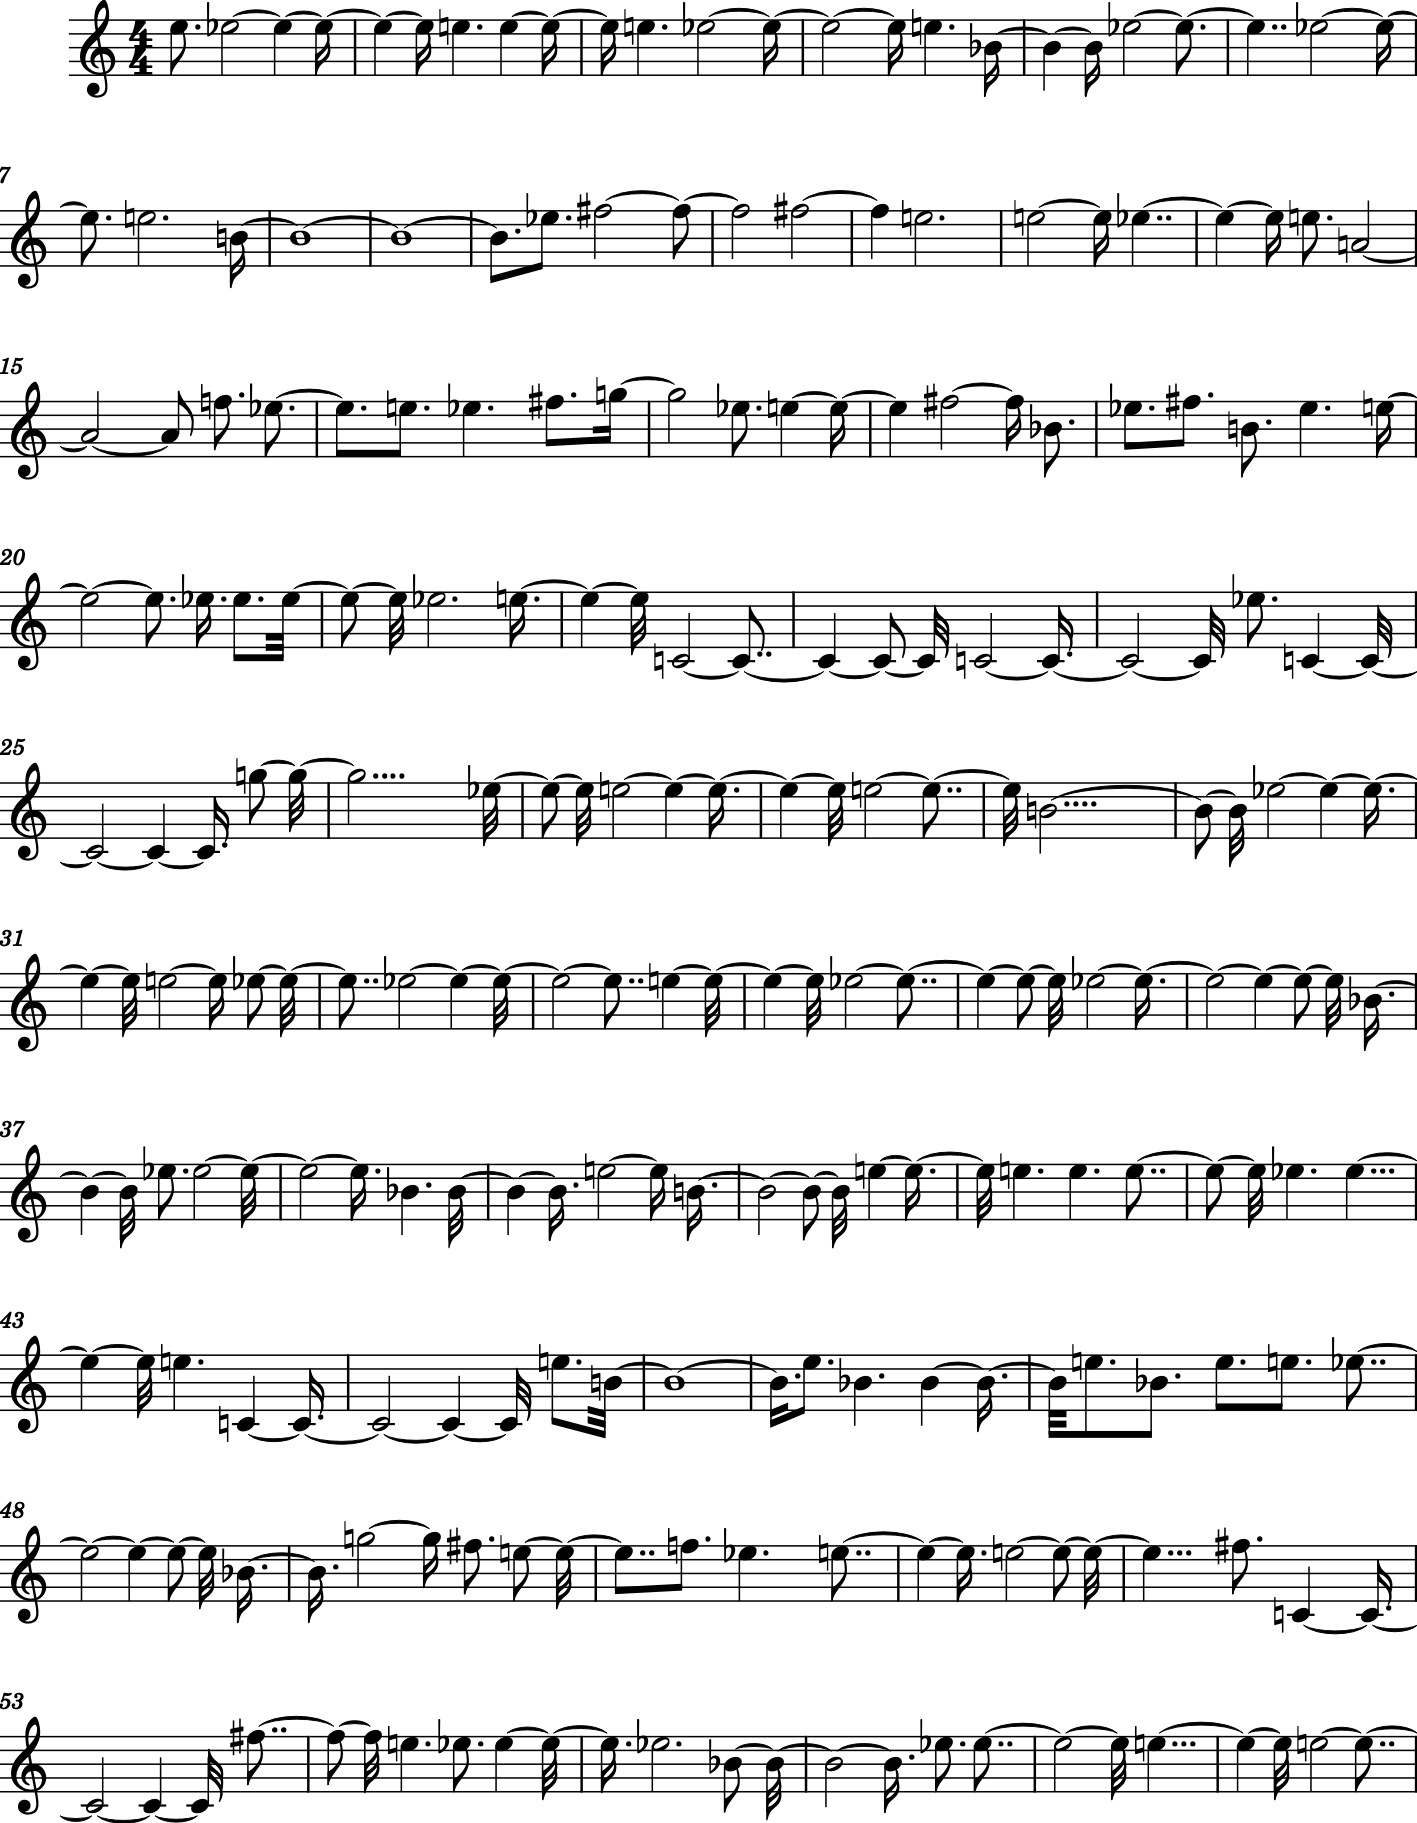

PosixPath('/Users/dongjin/Library/CloudStorage/OneDrive-postech.ac.kr/projects/academy2th/algo1_daechita(5).pdf')

In [6]:
###########################
# Correct version 

from sunau import AUDIO_FILE_ENCODING_LINEAR_16


s1 = stream.Stream()
s1.clear()

#under the assumption that the first one is 0 
z = int(random.choice(tuple(node_pool)) )
n1 = choose_node(z,nodelist,pitchlist,midilist)
s1.append(n1)

for j in range (1,len(overlap_matrix)-1):
    flag_current = int(np.sum(overlap_matrix[j,:]))
    flag_next = int(np.sum(overlap_matrix[j+1,:]))
    flag_previous = int(np.sum(overlap_matrix[j-1,:]))
    
    if flag_current == 0:
        
        if flag_previous >0 and flag_next > 0:
            y_previous = node_union(overlap_matrix[j-1,:])
            y_next = node_union(overlap_matrix[j+1,:])
            y = y_previous.union(y_next)
            z = int(random.choice(tuple(node_pool)))
            while z in y:
                z = int(random.choice(tuple(node_pool)))
                        
        elif flag_previous >0 and flag_next ==0 : 
            y = node_union(overlap_matrix[j-1,:])
            z = int(random.choice(tuple(node_pool)))
            while z in y:
                z = int(random.choice(tuple(node_pool)))
                        
        elif flag_previous == 0 and flag_next > 0: 
            y = node_union(overlap_matrix[j+1,:])
            z = int(random.choice(tuple(node_pool)))
            while z in y:
                z = int(random.choice(tuple(node_pool)))
        
        elif flag_previous == 0 and flag_next == 0:
            z = int(random.choice(tuple(node_pool)))
    
        n1 = choose_node(z,nodelist,pitchlist,midilist)
        s1.append(n1)
        
    else:
        y = node_intersect(overlap_matrix[j,:])
        z = int(random.choice(tuple(y)))
        n1 = choose_node(z,nodelist,pitchlist,midilist)
        s1.append(n1)
        
#under the assumption that the last one is 0 
z = int(random.choice(tuple(node_pool)) )
n1 = choose_node(z,nodelist,pitchlist,midilist)
s1.append(n1)

s1.show()

NewComposition=stream.Stream()
NewComposition.clear()
NewComposition.insert(0, meter.TimeSignature('12/8'))
NewComposition.keySignature= key.KeySignature(-3)
NewComposition.append(s1)
NewComposition.show('midi')
NewComposition.write("musicxml.pdf", "algo1_daechita(5).pdf")